In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Denver_Neighborhoods_SimpleR.csv')

In [3]:
df.head()

,X1,X2
0,NaN,NaN
1,6.9,84.9
2,NaN,NaN
3,8.4,172.6
4,NaN,NaN


In [4]:
# remove all NaN
dfNew = (df.dropna())

In [5]:
dfNew

,X1,X2
1,6.9,84.9
3,8.4,172.6
5,5.7,154.2
7,7.4,35.2
9,8.5,69.2
11,13.8,111.0
13,1.7,704.1
15,3.6,69.9
17,8.2,65.4
19,5.0,132.1


In [6]:
dfNew.rename(columns={'X1':'Total Population','X2':'Crime Rate'})

,Total Population,Crime Rate
1,6.9,84.9
3,8.4,172.6
5,5.7,154.2
7,7.4,35.2
9,8.5,69.2
11,13.8,111.0
13,1.7,704.1
15,3.6,69.9
17,8.2,65.4
19,5.0,132.1


In [7]:
# I hypothesize that anm increase in total 
# population will correlate with an increase in crime rate.

# The null hypothesis is that the there is a 1:1 correlation in an increase in
# crime rate with an increase in population

# An alternative hypothesis would suggest that there is a decrease in crime 
# rate with an increase in population
dfNew['X1']

1      6.9
3      8.4
5      5.7
7      7.4
9      8.5
11    13.8
13     1.7
15     3.6
17     8.2
19     5.0
21     2.1
23     4.2
25     3.9
27     4.1
29     4.2
31     9.4
33     3.6
35     7.6
37     8.5
39     7.5
41     4.1
43     4.6
45     7.2
47    13.4
49    10.3
51     9.4
53     2.5
55    10.3
57     7.5
59    18.7
61     5.1
63     3.7
65    10.3
67     7.3
69     4.2
71     2.1
73     2.5
75     8.1
77    10.3
79    10.5
81     5.8
83     6.9
85     9.3
87    11.4
Name: X1, dtype: float64

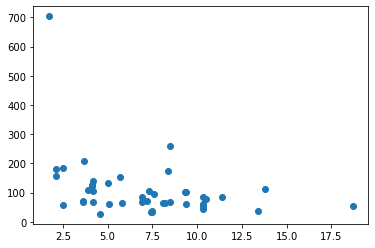

In [8]:
plt.scatter(dfNew['X1'],dfNew['X2'])

In [9]:
import statsmodels.formula.api as stats
lm_fit  = stats.ols(formula='dfNew.X2~dfNew.X1', data = dfNew).fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               dfNew.X2   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     6.263
Date:                Sun, 17 Apr 2022   Prob (F-statistic):             0.0163
Time:                        19:59:33   Log-Likelihood:                -263.63
No. Observations:                  44   AIC:                             531.3
Df Residuals:                      42   BIC:                             534.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    183.5269     33.449      5.487      0.000     116.025     251.029
dfNew.X1     -10.6378      4.251     -2.503      0.016     -19.216      -2.060
==============================================================================
Omnibus:                       69.814   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.758
Skew:                           3.935   Prob(JB):                    6.44e-171
Kurtosis:                      22.120   Cond. No.                         17.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

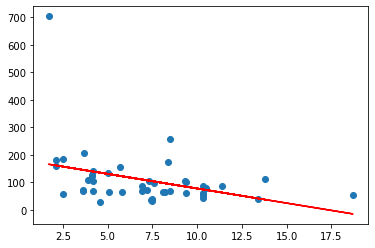

In [10]:
plt.scatter(dfNew.X1,dfNew.X2)
crimePred = lm_fit.predict(dfNew.X1)
plt.plot(dfNew.X1,crimePred,c = 'red')


In [24]:
dfNew = dfNew.reset_index()

In [37]:
np.mean(dfNew.X1)
size = np.floor(len(dfNew.X1))
xMean = [0 for x in range(int(size))]
xMeanSq = [0 for x in range(int(size))]
for i in range(len(xMean)):
    xMean[i]=dfNew.X1[i]-np.mean(dfNew.X1)
    xMeanSq[i] = xMean[i]*xMean[i]
xMeanSum = np.sum(xMeanSq)/size
std = np.sqrt(xMeanSum)
print('Standard deviation is: ',std)
sampleMean = np.mean(dfNew.X1)
print('Sample mean is: ', sampleMean)

Standard deviation is:  3.5140832363129273
Sample mean is:  7.04090909090909


In [42]:
# Find standard error
stdErr = std/np.sqrt(size)
print('Standard error of the set is: ', stdErr)

MoE = 1.96*stdErr
print('Margin of error: ',MoE)

# Calculate confidence interval 
confIntminus=sampleMean-MoE
confIntplus=sampleMean+MoE

print('We have a 95% confidence interval of ',confIntminus,' to ', confIntplus)


Standard error of the set is:  0.5297679807694449
Margin of error:  1.0383452423081119
We have a 95% confidence interval of  6.002563848600978  to  8.079254333217202


In [54]:
#standard error of estimated slope
beta1= -10.6378
sigma_hat_square = np.sum(np.power(dfNew.X1-crimePred,2))/(size-2)
sigma_hat = np.sqrt(sigma_hat_square)
# standard error of beta1_hat
se_beta1 = sigma_hat/np.sqrt(np.sum(np.power(dfNew.X1-np.mean(dfNew.X1), 2)))
print('The standard error of the set is: ', se_beta1)
t1 = (beta1-size)/(se_beta1)
print('The critical value for the test is: ', t1)

beta0 = 183.5269
y0pred = beta0 + beta1*dfNew.X1[0]
print('The predicted y0 is: ', y0pred,' while the true y0 is: ', dfNew.X2[0])

The standard error of the set is:  3.56276525119256
The critical value for the test is:  -15.335784467335072
The predicted y0 is:  110.12608  while the true y0 is:  84.9


84.9

In [58]:
# prediction intervals for predicted values

predIntminus = y0pred + t1*se_beta1
predIntplus = y0pred - t1*se_beta1
print('The prediction interval is ', predIntminus, ' and ', predIntplus)


The prediction interval is  55.48828  and  164.76388


In [62]:
# compute residuals
# res = actual y value - predicted y-value

r = [0 for x in range(int(size))]
y = [0 for x in range(int(size))]
yPred = [0 for x in range(int(size))]
for i in range(len(dfNew.X1)):
    y[i] = dfNew.X2[i]
    yPred[i] = beta0 + beta1*dfNew.X1[i]
    r[i] = y[i] - yPred[i]

Text(0, 0.5, 'Residuals, Actual Crime Rate - Predicted Crime Rate')

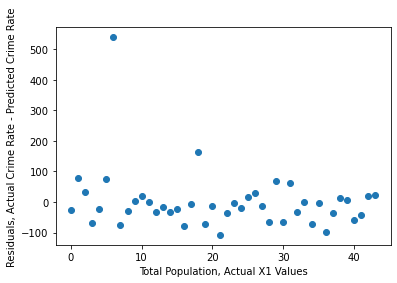

In [65]:
plt.scatter(range(len(dfNew.X1)),r)
plt.xlabel('Total Population, Actual X1 Values')
plt.ylabel('Residuals, Actual Crime Rate - Predicted Crime Rate')

   dfb_Intercept  dfb_dfNew.X1   cooks_d  standard_resid  hat_diag  \
1      -0.018737      0.001557  0.000773       -0.257549  0.022764   
3       0.012264      0.047187  0.008631        0.802123  0.026127   
5       0.038126     -0.018462  0.001370        0.320183  0.026036   
7      -0.038266     -0.011011  0.005937       -0.710735  0.022965   
9      -0.002773     -0.015341  0.000819       -0.244554  0.026645   

   dffits_internal  student_resid    dffits  
1        -0.039308      -0.254666 -0.038868  
3         0.131381       0.798658  0.130814  
5         0.052350       0.316735  0.051786  
7        -0.108964      -0.706484 -0.108312  
9        -0.040462      -0.241798 -0.040006  


Text(0, 0.5, 'Leverage, Actual Crime Rate - Predicted Crime Rate')

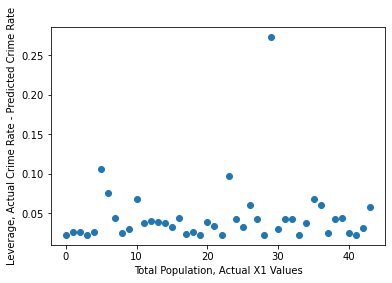

In [72]:
influence = lm_fit.get_influence()
inf_sum = influence.summary_frame()

print(inf_sum.head())
leverage = influence.hat_matrix_diag

plt.scatter(range(len(dfNew.X1)),leverage)
plt.xlabel('Total Population, Actual X1 Values')
plt.ylabel('Leverage, Actual Crime Rate - Predicted Crime Rate')

In [73]:
# Problem 5: Create diagnostic plots of the linear regression fit. Are there any problems with the fit? Are there
# any unusually large outliers? Are there any observations with unusually high leverage?
# 
# From the residuals and leverage plots it is clear that there is one dominant outlier
# the y point near ~700. There is also a point with unusually high leverage, the point seen on the
# leverage chart with leverage > 0.25. 

In [ ]:
# Problem 6: Test the null hypotheses that the slope and intercept are zero in exercise 3. Do the empirical
# results support the hypothesis? If your analysis fails to reject the null hypothesis, can you
# identify the reasons?

# The null hypothesis would suggest that the slope of the linear regression line 
# for these two variable would be 1 and the intercept would be zero, suggesting that there is no relationship 
# between them. Instead, the slope and the intercept suggest that with an increase in 
# total population, there is a decrease in crime rate per 1000 persons.

# This study fails to reject the null hypothesis due to Beta1 and Beta0 indicating a decreasing relationship
# between the total population and the crime rate.

